<font color="blue">  </font>

# I. Introduction

The classification goal is to predict if the client will subscribe a term deposit (variable y).

# II. Data


   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).


In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as conm
from prml.preprocess import PolynomialFeature
from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron,
)
dataf = pd.read_csv('bank-full.csv', delimiter=';')
#print(data)

#pd.set_option('display.max_columns', None)
name = dataf['balance']
output = dataf['y']
#print(name)
#print(price)
#plt.bar(name,output)
#plt.show()


In [2]:
dataf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the numeric data shown in the above table, it can be seen that the 'campaign' and 'previous' features are the ones with the least standard deviation, thus least variance. 

# Comparing numeric data 

C:\Users\lingeswaren\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


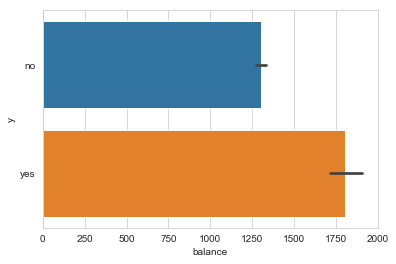

In [3]:
sns.set_style('whitegrid')
plt.figure()
sns.barplot(x = dataf['balance'], y = dataf['y'])

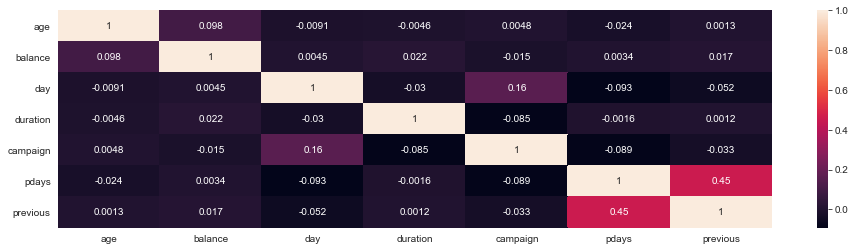

In [4]:
plt.figure(figsize = (16,4))
corelation = dataf.corr()
sns.heatmap(corelation, annot=True)
plt.show()

It can be seen that 'pdays' and 'previous' features have high correlation.

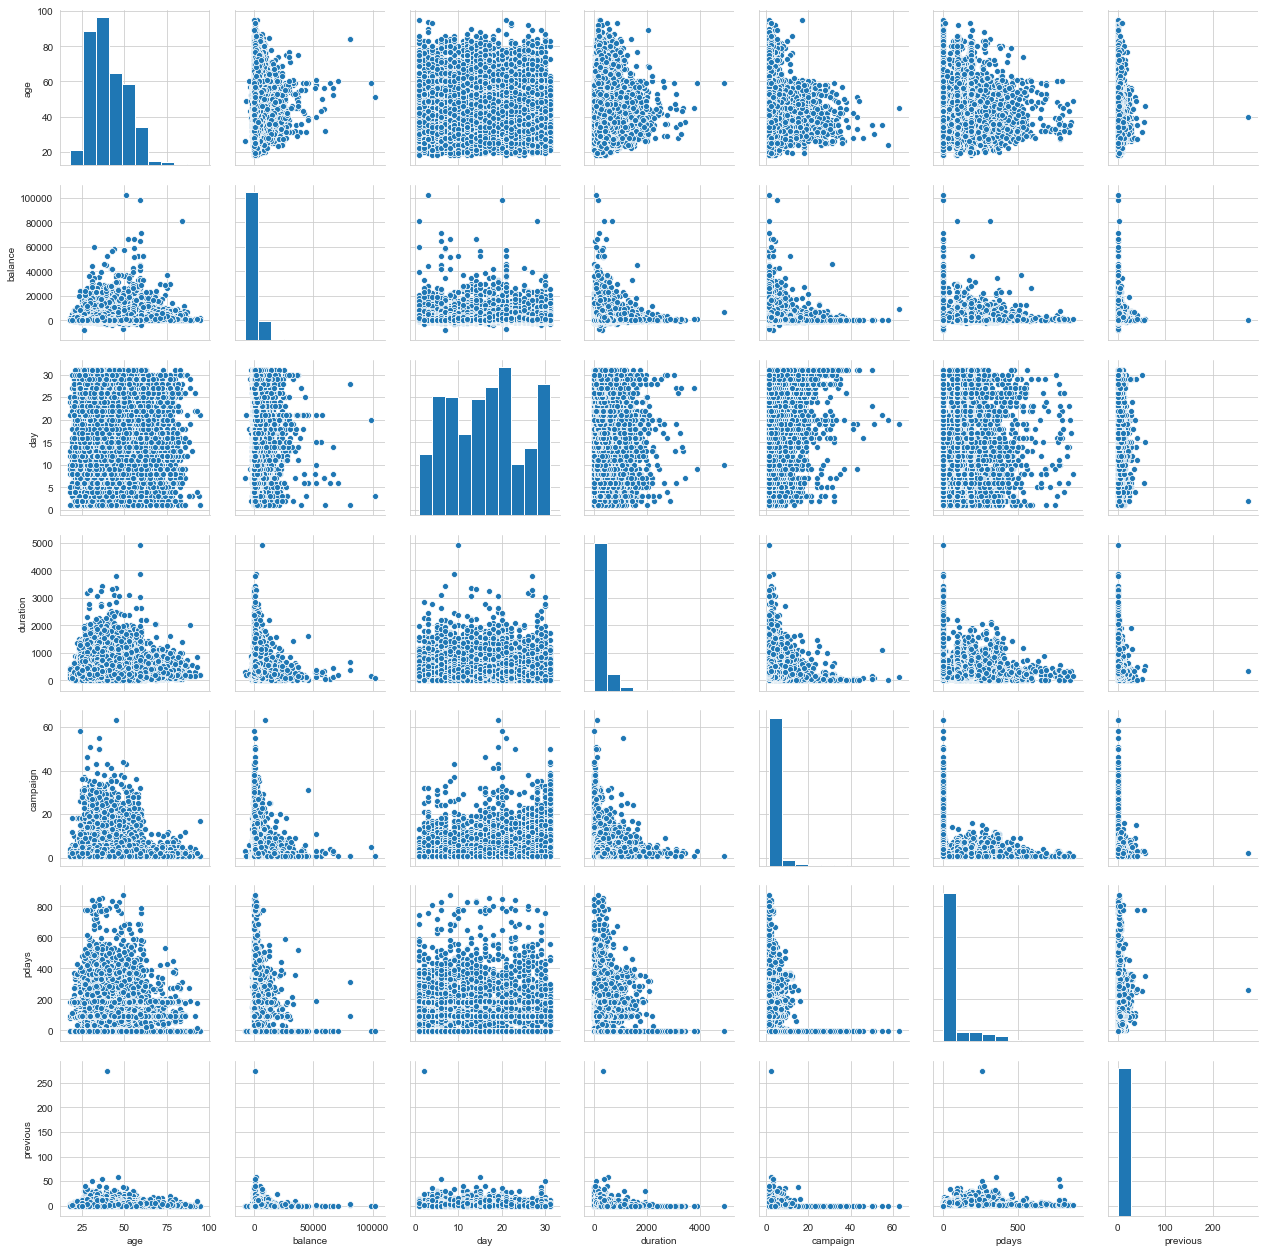

In [107]:
sns.pairplot(dataf)

It can be seen that the plot is least varying for 'categorical' and 'previous'.

# Compute categorical data

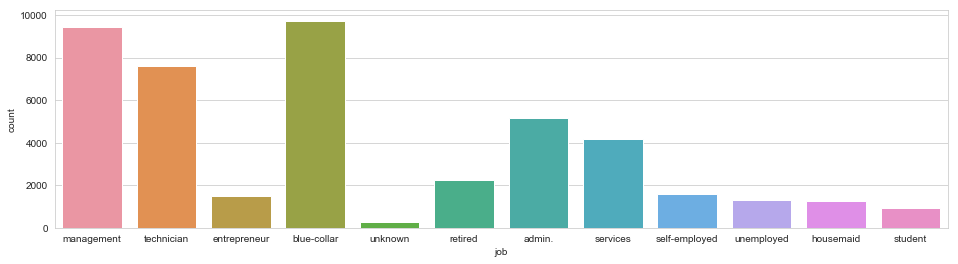

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize = (16,4))
sns.countplot(dataf['job'])

It can be seen that people with blue-collar jobs are the most in the dataset.

# III. Method

 - review of the 4 classification models 
 - Implementation and description


### Method

The string labels are encoded to numbers and the splitting for training, testing data and storing the values in array format is coded here.

In [6]:
##your method implementation goes here
# Label Encoding and Data Splitting
bankdataf = dataf
for col in bankdataf.columns:
    if bankdataf[col].dtypes != 'int64':
        bankdataf[col] = bankdataf[col].astype('category')
        bankdataf[col] = bankdataf[col].cat.codes

dataf = bankdataf
y = np.asarray(dataf['y'])
y = y.reshape(y.shape[0],1)
feature_cols = dataf.columns.tolist()
feature_cols.remove('y')
x = np.asarray(dataf[feature_cols])
#x = data[feature_cols]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train = y_train.reshape(len(y_train),)
print(type(y_train))


<class 'numpy.ndarray'>


In [7]:
##Least Square Classifier
x1_test, x2_test = np.meshgrid(np.linspace(0, 5000, 1000), np.linspace(0, 70, 1000))
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(X_train, y_train)
Y1 = model.classify(X_test)
print("The accuracy of Least Squares Classifier is:", format(accuracy_score(y_test,Y1)))
print("The f1_score of Least Squares Classifier is:", format(f1_score(y_test,Y1)))

The accuracy of Least Squares Classifier is: 0.8889748977109366
The f1_score of Least Squares Classifier is: 0.20063694267515925


# Least square Classifier:
Least Squares Classifier, works on the concept of the minimization of a sum-of-squares error function which led to a
simple closed-form solution for the parameter values. This method approximates the conditional expectation E[t|x] of the target values given the input vector.

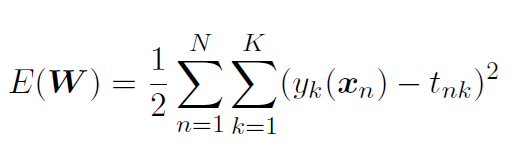

By differentiating the above sum-of-squares error function w.r.t W(weights) and equating it to zero, the weights are calculated. This calculation is done using the pseudo inverse of the data given(X_train). These wright values are used to determine the decision boundaries between the two different sets of data.
# Description of important functions and classes in the code:
1) PolynomialFeature(n) = This function is feature generator to append a column of 1 to the training and testing data. So when x,y is given as input,  it gives 1,x,y as output.<br>
2) model - the type of classifier<br>
3) model.fit() - Used to find the weight matrix for the least square classifier model<br>
4) model.classify() - Used to classify the data, by considering the data and weight matrix calculated using fit function.<br>
# Implementation:
The classifier works by taking the split data (x_train, x_test) and feature transforms them using PolynomialFeature(). The new transformed functions are used to calculate the weight matrix using the model.fit() function which works on the formula given above in the review of Least square classifier. Finally, this weight matrix and the feature transformed test data is used by model.classify(). This gives the maximum of the two index values, which is the classication of the model.


In [8]:
#Fishers Linear Discriminant
model = FishersLinearDiscriminant()
model.fit(x_train, y_train)
Y2 = model.classify(x_test)
print("The accuracy of Fishers Linear Discriminant classifier is:", format(accuracy_score(y_test,Y2)))
print("The f1_score of Fishers Linear Discriminant classifier is:", format(f1_score(y_test,Y2)))

The accuracy of Fishers Linear Discriminant classifier is: 0.8100187990711047
The f1_score of Fishers Linear Discriminant classifier is: 0.4850119904076739


# Fisher Linear Discriminant Classifier:
This is a two-class linear discriminant function, where the data given in clusters can be projected on to a line, followed by a threshold value.
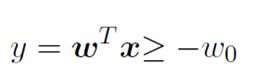!
It is more like a dimensionality(D) reduction of the given data to D-1. So a 2D data can be projected on to a line, thus making it to be 1D. The goal is to find a decision threshold along this 1D projection (line). This is based on the concept of fisher's criterion, which states that to get the perfect boundary, we need to maximize ratio of inter class separation (between-class covariance) to intra class variance (within-class covariance).

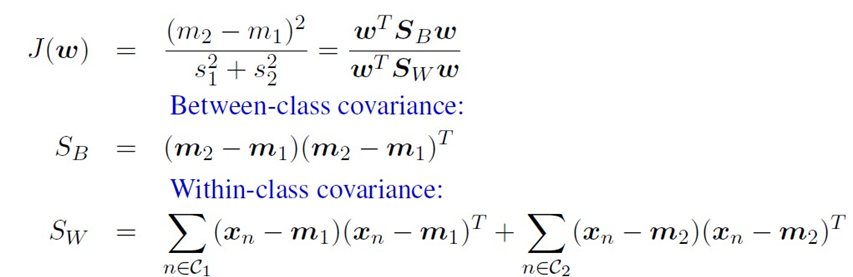

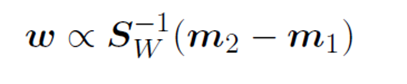

From the above equations the weights are calculated and a gaussian discriminant analysis(GDA) is perfomed to calculate the threshold value.

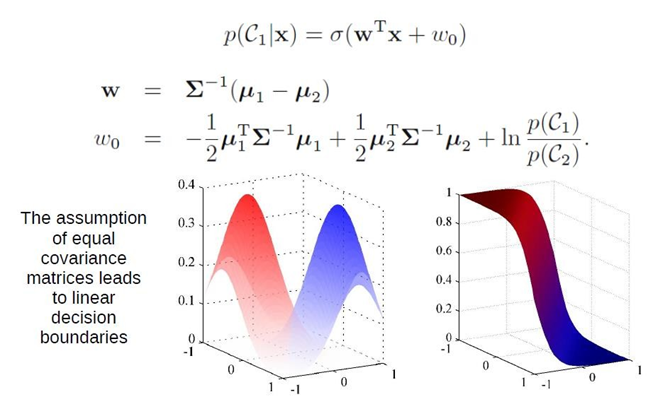

# Description of important functions and classes in the code:
1) model - the type of classifier<br>
2) model.fit() - This function calculates the threshold value that is used for classification of any given input  <br>
4) model.classify() - Used to classify the data, by considering the input data and threshold value calculated using fit function.<br>
# Implementation:
The classifier works by taking the split data (x_train, x_test). These data are used to calculate the threshold value using the model.fit() function. This function calculates the means of the different classes, and then uses them to calculate the within-class covariance Sw, which is used to solve for the weights. Next,a gaussian discriminant analysis(GDA) is performed on the weights to calculate the threshold value. Finally, this threshold is used to classify the given model into class 0 or class 1.

In [9]:
#Logistic Regression 
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)
Y3 = model.classify(x_test)
print("The accuracy of Logistic Regression classifier is:", format(accuracy_score(y_test,Y3)))
print("The f1_score of Logistic Regression classifier is:", format(f1_score(y_test,Y3)))

The accuracy of Logistic Regression classifier is: 0.8877584872276899
The f1_score of Logistic Regression classifier is: 0.2857142857142857


# Logistic Regression:<br>
Logistic regression is a discriminative model, that works based on a logistic function used to model the conditional probability of the output Y with variables X. This model will have D+1 parameters, where D represents the dimensionality of X.
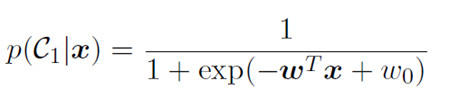
Here, the exponential part is the output equation, where w0 and w1 are the weights of the model.
It is used for classification, even though its a regression
For the dataset,

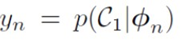

The corresponding cross entropy can be defined as, where p represents the likelihood function:
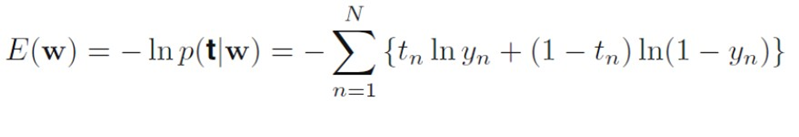

# Description of important functions and classes in the code:<br>
1) PolynomialFeature(n) = This function is feature generator to append a column of 1 to the training and testing data, so that it will be easy to vectorize the implementation. So when x,y is given as input,  it gives 1,x,y as output.<br>
2) model - the type of classifier<br>
3) model.fit() - Used to find the weight matrix for the Logistic Regression Classifier model<br>
4) model.classify() - Used to classify the data, by considering the probabaility of the predicted to be positive/true(calculated using the weight function derived using model.fit()) and compare it with the threshold value to classify the model data.<br>
# Implementation:<br>
The classifier works by taking the split data (x_train, x_test) and feature transforms them using PolynomialFeature(). The new transformed functions are used to calculate the weight matrix using the model.fit() function. In Logistic Regression, unlike Least square the weight function keeps getting updated for every iteration, which is used to calculate the probability of the input passed to be true. Finally, this probability is compared with the threshold value, is used to classify the given model into class 0 or class 1.

In [10]:
#Perceptron
model = Perceptron()
y_train[y_train==0] = -1
model.fit(x_train, y_train)
Y4 = model.classify(x_test)
Y4[Y4==-1] = 0
print("The accuracy of Perceptron classifier is:", format(accuracy_score(y_test,Y4)))
print("The f1_score of Perceptron classifier is:", format(f1_score(y_test,Y4)))

The accuracy of Perceptron classifier is: 0.36779829702532346
The f1_score of Perceptron classifier is: 0.21350942357958455


# Perceptron Classifier:
Perceptron is a binary classification algorithm, which consists of a single activation function that acts as a neuron. It  takes a row of data as input and predicts a class label
Perceptron works on the principle of stochastic gradient descent
$ w^{(\tau+1)}  = w^{(\tau)}+ \nu \phi_n t_n$
The model is trained until it reaches convergence, which achived when the model remains constant i.e, it does not change over time.

# Implementation
1) model.fit() funtion
  Convert the y values into 1 and -1.
  We initialize the weights.
  For loop till we dont reach convergence(maximum epochs).
  We get the sign of training data and the label which we will use to update the weights.
  select a random data point from the dataset and multiply the weights and check.
  If we get convergence or a positive output the loop is stopped and consider these weights<br>
2) model.classify()
  This function multiplies the weights(obtained from the fit funtion) with testing data.
  and classify according to 1 and -1.<br>
3) The values are converted back to binary(0,1) by replacing all the values of -1 by 0.

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

Plotting and choice of evalutaion metrics:
The heatmap is plot for all the confusion matrix. The evalutaion metric selected is accuracy score and f1_score. Using the heatmap the accuracy score can be calculated. The 4 different models are evaluated based on the accuracy scores.<br>

Least Square Classifier
Confusion Matrix 

[[7913   80]
 [ 924  126]]


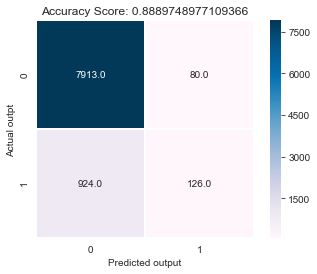

In [11]:
print("Least Square Classifier")
print("Confusion Matrix","\n")
score = accuracy_score(y_test, Y1)
fscore = f1_score(y_test, Y1)
conm1 = conm(y_test, Y1)
print(conm1)
sns.heatmap(conm1, annot=True, fmt=".1f", linewidths=.8, square = True, cmap = 'PuBu')
plt.ylabel('Actual outpt')
plt.xlabel('Predicted output')
plt.title('Accuracy Score: {0}'.format(score))
plt.show()

Fishers Linear Discriminant Classifier
Confusion Matrix 

[[6516 1477]
 [ 241  809]]


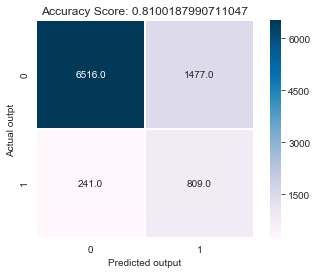

In [12]:
print("Fishers Linear Discriminant Classifier")
print("Confusion Matrix","\n")
score = accuracy_score(y_test, Y2)
fscore = f1_score(y_test, Y2)
conm1 = conm(y_test, Y2)
print(conm1)
sns.heatmap(conm1, annot=True, fmt=".1f", linewidths=.8, square = True, cmap = 'PuBu')
plt.ylabel('Actual outpt')
plt.xlabel('Predicted output')
plt.title('Accuracy Score: {0}'.format(score))
plt.show()

Logistic Regression Classifier
Confusion Matrix 

[[7825  168]
 [ 847  203]]


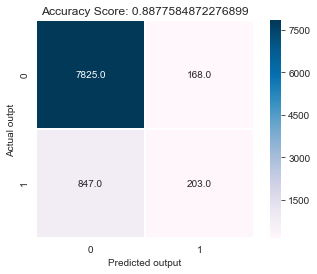

In [13]:
print("Logistic Regression Classifier")
print("Confusion Matrix","\n")
score = accuracy_score(y_test, Y3)
fscore = f1_score(y_test, Y3)
conm1 = conm(y_test, Y3)
print(conm1)
sns.heatmap(conm1, annot=True, fmt=".1f", linewidths=.8, square = True, cmap = 'PuBu')
plt.ylabel('Actual outpt')
plt.xlabel('Predicted output')
plt.title('Accuracy Score: {0}'.format(score))
plt.show()


Perceptron Classifier
Confusion Matrix 

[[2550 5443]
 [ 274  776]]


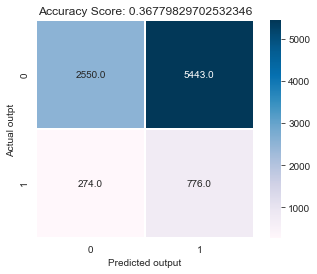

In [14]:
print("Perceptron Classifier")
print("Confusion Matrix","\n")
score = accuracy_score(y_test, Y4)
fscore = f1_score(y_test, Y4)
conm1 = conm(y_test, Y4)
print(conm1)
sns.heatmap(conm1, annot=True, fmt=".1f", linewidths=.8, square = True, cmap = 'PuBu')
plt.ylabel('Actual outpt')
plt.xlabel('Predicted output')
plt.title('Accuracy Score: {0}'.format(score))
plt.show()

# Conclusions


From the output we can see that the maximum score is for the Least square Classifier. So the most suitable classifier considering the accuracy as evaluation metric for the given data is LEAST SQUARES CLASSIFIER. If the f1_score is considered, then the most suitable model is the FISHERS LINEAR DISCRIMINANT CLASSIFIER. From the confusion matrix it can be seen that the accuracy score for perceptron classifier keeps changing whereas for other classifiers it remains constant. It is because everytime when data is split into training and testing data at the start of the implementation, the convergence point also keeps changing with respect to it.

# References
Bishop - Pattern Recognition And Machine Learning - Springer  2006-1-300
https://medium.com/@jameschen_78678/which-customers-are-more-likely-to-respond-to-banks-marketing-campaigns-3f00c512268d
https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/#:~:text=The%20Perceptron%20is%20a%20linear%20classification%20algorithm.,hyperplane)%20in%20the%20feature%20space.&text=This%20is%20called%20the%20Perceptron,training%20dataset%2C%20called%20an%20epoch.
https://medium.com/swlh/exploratory-data-analysis-on-the-bank-marketing-data-set-with-pandas-and-seaborn-72e5c05e0076
https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53
https://archive.ics.uci.edu/ml/datasets/bank+marketing